In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
df = pd.read_csv('/dataset/data/raw_data.csv')

NameError: name 'pd' is not defined

# data persentase pelayanan kesehatan pada bayi di Tasikmalaya

In [4]:
df

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kode_kecamatan,nama_kecamatan,puskesmas,jenis_kelamin,persentase_pelayanan,satuan,tahun
0,1,32,JAWA BARAT,3278,KOTA TASIKMALAYA,3278010,KAWALU,KAWALU,LAKI-LAKI,100.00,PERSEN,2018
1,2,32,JAWA BARAT,3278,KOTA TASIKMALAYA,3278010,KAWALU,KAWALU,PEREMPUAN,100.00,PERSEN,2018
2,3,32,JAWA BARAT,3278,KOTA TASIKMALAYA,3278010,KAWALU,KARANGANYAR,LAKI-LAKI,104.65,PERSEN,2018
3,4,32,JAWA BARAT,3278,KOTA TASIKMALAYA,3278010,KAWALU,KARANGANYAR,PEREMPUAN,96.28,PERSEN,2018
4,5,32,JAWA BARAT,3278,KOTA TASIKMALAYA,3278010,KAWALU,URUG,LAKI-LAKI,103.19,PERSEN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
213,214,32,JAWA BARAT,3278,KOTA TASIKMALAYA,3278080,CIPEDES,CIPEDES,PEREMPUAN,97.50,PERSEN,2023
214,215,32,JAWA BARAT,3278,KOTA TASIKMALAYA,3278080,CIPEDES,PANGLAYUNGAN,LAKI-LAKI,93.00,PERSEN,2023
215,216,32,JAWA BARAT,3278,KOTA TASIKMALAYA,3278080,CIPEDES,PANGLAYUNGAN,PEREMPUAN,112.30,PERSEN,2023
216,217,32,JAWA BARAT,3278,KOTA TASIKMALAYA,3278080,CIPEDES,CIGEUREUNG,LAKI-LAKI,99.30,PERSEN,2023


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    218 non-null    int64  
 1   kode_provinsi         218 non-null    int64  
 2   nama_provinsi         218 non-null    object 
 3   kode_kabupaten_kota   218 non-null    int64  
 4   nama_kabupaten_kota   218 non-null    object 
 5   kode_kecamatan        218 non-null    int64  
 6   nama_kecamatan        218 non-null    object 
 7   puskesmas             218 non-null    object 
 8   jenis_kelamin         218 non-null    object 
 9   persentase_pelayanan  218 non-null    float64
 10  satuan                218 non-null    object 
 11  tahun                 218 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 20.6+ KB


# checking data

In [6]:
df['tahun'].unique()

array([2018, 2020, 2021, 2022, 2023])

In [7]:
column_to_drop = [
    'id',
    'kode_provinsi',
    'nama_provinsi',
    'kode_kabupaten_kota',
    'nama_kabupaten_kota',
    'kode_kecamatan',
    'satuan',
    'tahun']
df = df.drop(columns=column_to_drop)
df

,nama_kecamatan,puskesmas,jenis_kelamin,persentase_pelayanan
0,KAWALU,KAWALU,LAKI-LAKI,100.00
1,KAWALU,KAWALU,PEREMPUAN,100.00
2,KAWALU,KARANGANYAR,LAKI-LAKI,104.65
3,KAWALU,KARANGANYAR,PEREMPUAN,96.28
4,KAWALU,URUG,LAKI-LAKI,103.19
...,...,...,...,...
213,CIPEDES,CIPEDES,PEREMPUAN,97.50
214,CIPEDES,PANGLAYUNGAN,LAKI-LAKI,93.00
215,CIPEDES,PANGLAYUNGAN,PEREMPUAN,112.30
216,CIPEDES,CIGEUREUNG,LAKI-LAKI,99.30


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nama_kecamatan        218 non-null    object 
 1   puskesmas             218 non-null    object 
 2   jenis_kelamin         218 non-null    object 
 3   persentase_pelayanan  218 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.9+ KB


# cleaning data

In [9]:
def cap_percentage(data):
  if data > 100:
    return 100.00
  elif data < 0:
    return 0
  else:
    return data

In [10]:
df['persentase_pelayanan'] = df['persentase_pelayanan'].apply(cap_percentage)

In [11]:
df['persentase_pelayanan'].unique()

array([100.  ,  96.28,  94.05,  98.08,  91.67,  91.57,  92.7 ,  97.65,
        93.06,  90.74,  98.41,  99.25,  95.39,  99.31,  90.27,  95.51,
        99.7 ,  91.9 ,  83.8 ,  77.1 ,  98.3 ,  87.7 ,  90.  ,  93.7 ,
        96.5 ,  98.2 ,  78.7 ,  79.3 ,  93.5 ,  97.  ,  78.9 ,  80.6 ,
        40.  ,  41.2 ,  96.7 ,  97.5 ,  98.  ,  92.6 ,  97.1 ,  92.8 ,
        86.3 ,  94.9 ,  53.8 ,  49.3 ,  90.1 ,  85.6 ,  84.1 ,  76.2 ,
        73.4 ,  68.1 ,  94.5 ,  97.2 ,  87.8 ,  91.3 ,  94.7 ,  89.3 ,
        85.2 ,  93.8 ,  94.3 ,  95.8 ,  82.9 ,  97.6 ,  95.9 ,  97.3 ,
        94.  ,  98.7 ,  54.9 ,  46.  ,  50.3 ,  50.7 ,  47.3 ,  46.2 ,
        46.8 ,  52.  ,  51.  ,  49.5 ,  51.2 ,  52.3 ,  53.2 ,  47.8 ,
        63.3 ,  70.6 ,  64.8 ,  49.2 ,  52.1 ,  50.4 ,  53.  ,  51.5 ,
        55.2 ,  49.6 ,  48.1 ,  57.8 ,  43.6 ,  49.8 ,  45.4 ,  63.  ,
        66.9 ,  51.9 ,  48.3 ,  47.5 ,  54.7 ,  93.4 ,  93.6 ,  99.6 ,
        77.7 ,  89.1 ,  95.7 ,  88.8 ,  99.4 ,  93.2 ,  87.3 ,  93.9 ,
      

## mengubah kolom persentase pelayanan menjadi categoric

In [12]:
def categorize_service(data):
  if data < 60:
    return 'TIDAK LAYAK'
  elif data < 80:
    return 'CUKUP'
  else:
    return 'LAYAK'

In [13]:
df['kategori_pelayanan'] = df['persentase_pelayanan'].apply(categorize_service)

In [14]:
df['kategori_pelayanan'].unique()

array(['LAYAK', 'CUKUP', 'TIDAK LAYAK'], dtype=object)

In [15]:
df

,nama_kecamatan,puskesmas,jenis_kelamin,persentase_pelayanan,kategori_pelayanan
0,KAWALU,KAWALU,LAKI-LAKI,100.00,LAYAK
1,KAWALU,KAWALU,PEREMPUAN,100.00,LAYAK
2,KAWALU,KARANGANYAR,LAKI-LAKI,100.00,LAYAK
3,KAWALU,KARANGANYAR,PEREMPUAN,96.28,LAYAK
4,KAWALU,URUG,LAKI-LAKI,100.00,LAYAK
...,...,...,...,...,...
213,CIPEDES,CIPEDES,PEREMPUAN,97.50,LAYAK
214,CIPEDES,PANGLAYUNGAN,LAKI-LAKI,93.00,LAYAK
215,CIPEDES,PANGLAYUNGAN,PEREMPUAN,100.00,LAYAK
216,CIPEDES,CIGEUREUNG,LAKI-LAKI,99.30,LAYAK


# visualisasi data

In [16]:
df_puskesmas_kecamatan = df.groupby('nama_kecamatan')['puskesmas'].nunique().reset_index()
df_puskesmas_kecamatan.columns = ['nama_kecamatan', 'jumlah_puskesmas']
df_puskesmas_kecamatan

,nama_kecamatan,jumlah_puskesmas
0,BUNGURSARI,3
1,CIBEUREUM,2
2,CIHIDEUNG,2
3,CIPEDES,3
4,INDIHIANG,2
5,KAWALU,3
6,MANGKUBUMI,2
7,PURBARATU,1
8,TAMANSARI,2
9,TAWANG,2


* pada kecamatan kawalu, bungursari, cipedes memiliki jumlah puskesmas yang paling banyak
* pada kecamatan purbaratu memiliki jumlah puskesmas yang paling sedikit

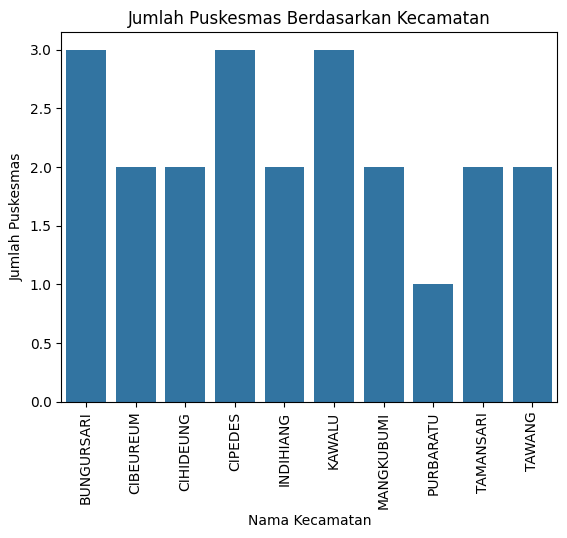

In [17]:
sns.barplot(data=df_puskesmas_kecamatan, x='nama_kecamatan', y='jumlah_puskesmas')
plt.xticks(rotation=90)
plt.xlabel('Nama Kecamatan')
plt.ylabel('Jumlah Puskesmas')
plt.title('Jumlah Puskesmas Berdasarkan Kecamatan')
plt.savefig('jumlah_puskesmas_berdasarkan_kecamatan.png', dpi=300)
plt.show()

* disetiap kecamatan memiliki cukup banyak pelayanan yang LAYAK
* namun pemerintah setempat tetap harus memperhatikan pelayanan yang TIDAK LAYAK pada setiap kecamatan
* serta perlu adanya peningkatan pelayanan di beberapa kecamatan

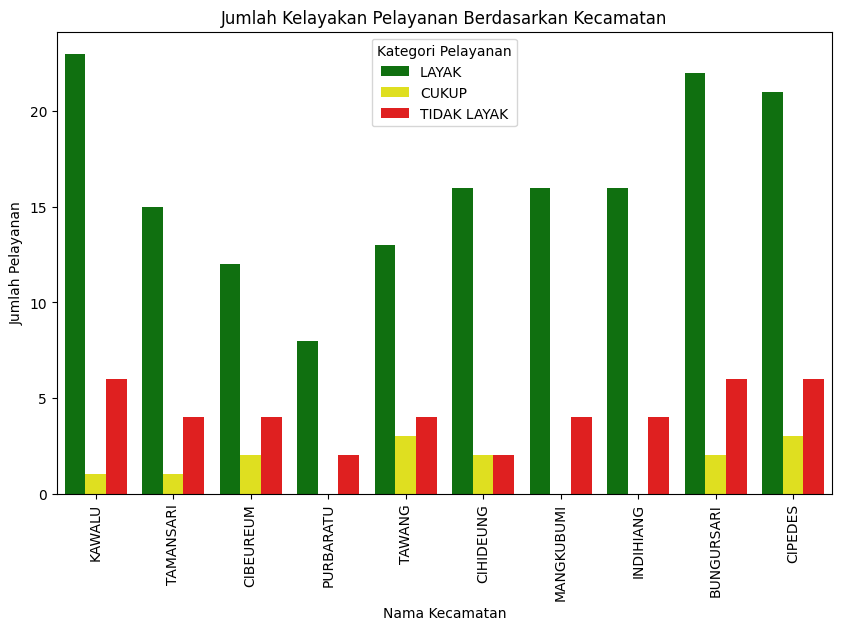

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='nama_kecamatan', hue='kategori_pelayanan', palette=['green', 'yellow', 'red'])
plt.xticks(rotation=90) #rotasi nama kecamatannya
plt.xlabel('Nama Kecamatan')
plt.ylabel('Jumlah Pelayanan')
plt.title('Jumlah Kelayakan Pelayanan Berdasarkan Kecamatan')
plt.legend(title='Kategori Pelayanan')
plt.show()

# Encoding data

In [19]:
def encoding_kategori(data):
  if data == 'LAYAK':
    return 3
  elif data == 'CUKUP':
    return 2
  else:
    return 1

In [20]:
df['kategori_pelayanan'] = df['kategori_pelayanan'].apply(encoding_kategori)

In [21]:
df

,nama_kecamatan,puskesmas,jenis_kelamin,persentase_pelayanan,kategori_pelayanan
0,KAWALU,KAWALU,LAKI-LAKI,100.00,3
1,KAWALU,KAWALU,PEREMPUAN,100.00,3
2,KAWALU,KARANGANYAR,LAKI-LAKI,100.00,3
3,KAWALU,KARANGANYAR,PEREMPUAN,96.28,3
4,KAWALU,URUG,LAKI-LAKI,100.00,3
...,...,...,...,...,...
213,CIPEDES,CIPEDES,PEREMPUAN,97.50,3
214,CIPEDES,PANGLAYUNGAN,LAKI-LAKI,93.00,3
215,CIPEDES,PANGLAYUNGAN,PEREMPUAN,100.00,3
216,CIPEDES,CIGEUREUNG,LAKI-LAKI,99.30,3


In [22]:
# melakukan one-hot-encoding pada seluruh data kategorik dan merubahnya dengan 0 dan 1
df = pd.get_dummies(
    data=df,
    columns=['nama_kecamatan', 'puskesmas', 'jenis_kelamin'],
    prefix={'nama_kecamatan': 'kecamatan', 'puskesmas': 'puskesmas', 'jenis_kelamin': 'gender'} # rubah nama kolom
).astype(int)
df

,persentase_pelayanan,kategori_pelayanan,kecamatan_BUNGURSARI,kecamatan_CIBEUREUM,kecamatan_CIHIDEUNG,kecamatan_CIPEDES,kecamatan_INDIHIANG,kecamatan_KAWALU,kecamatan_MANGKUBUMI,kecamatan_PURBARATU,...,puskesmas_PARAKANNYASAG,puskesmas_PURBARATU,puskesmas_SAMBONGPARI,puskesmas_SANGKALI,puskesmas_SUKALAKSANA,puskesmas_TAMANSARI,puskesmas_TAWANG,puskesmas_URUG,gender_LAKI-LAKI,gender_PEREMPUAN
0,100,3,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,100,3,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,100,3,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,96,3,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,100,3,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,97,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
214,93,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
215,100,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
216,99,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   persentase_pelayanan     218 non-null    int64
 1   kategori_pelayanan       218 non-null    int64
 2   kecamatan_BUNGURSARI     218 non-null    int64
 3   kecamatan_CIBEUREUM      218 non-null    int64
 4   kecamatan_CIHIDEUNG      218 non-null    int64
 5   kecamatan_CIPEDES        218 non-null    int64
 6   kecamatan_INDIHIANG      218 non-null    int64
 7   kecamatan_KAWALU         218 non-null    int64
 8   kecamatan_MANGKUBUMI     218 non-null    int64
 9   kecamatan_PURBARATU      218 non-null    int64
 10  kecamatan_TAMANSARI      218 non-null    int64
 11  kecamatan_TAWANG         218 non-null    int64
 12  puskesmas_BANTAR         218 non-null    int64
 13  puskesmas_BUNGURSARI     218 non-null    int64
 14  puskesmas_CIBEUREUM      218 non-null    int64
 15  puskes

# Multiclass Classification with RandomForest

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [25]:
x = df.drop(columns=['kategori_pelayanan'])
y = df['kategori_pelayanan']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)

In [28]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_pred = rf.predict(X_test)

## akurasi model

In [30]:
print(f'Akurasi: {accuracy_score(y_test, y_pred)}')

Akurasi: 0.9545454545454546


## classification report

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.00      0.00      0.00         2
           3       0.94      1.00      0.97        31

    accuracy                           0.95        44
   macro avg       0.65      0.67      0.66        44
weighted avg       0.91      0.95      0.93        44



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Cross Validation

In [32]:
k = 5
cv_scores = cross_val_score(rf, x, y, cv=k, scoring='accuracy').mean()
print(f'Akurasi: {cv_scores}')

Akurasi: 0.9219873150105707
